<a href="https://colab.research.google.com/github/saha-trideep/telecom_churn-/blob/main/Telecom_Churn_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type-**    - Exploratory Data Analysis
##### **Contribution-**    - Individual
##### **Name  -** - Trideep Saha

# **Project Summary -**

**Objective**: The primary goal of this telecom churn analysis project is to gain deep insights into customer behavior within Orange S.A. (formerly France Télécom S.A.) and to predict customer churn in their telecom services.

**Dataset and Scope**: We are working with a comprehensive customer churn dataset from Orange S.A. Our analysis encompasses a thorough Exploratory Data Analysis (EDA) process to assess various factors that may influence customer subscription cancellations.

### Key Steps:

**Churn Rate Identification**: We start by calculating the churn rate, which reveals the percentage of customers who have discontinued their subscriptions. This initial step provides us with a clear understanding of the magnitude and impact of customer churn.

**Call Duration Analysis**: We investigate the distribution of call durations among both churned and non-churned customers. Our aim is to uncover any significant differences in call duration between these two groups.

**International Plan Impact**: We assess the churn rates for customers with and without international plans. This analysis helps us determine if having an international plan affects customer retention.

**Voicemail Plan Subscription**: We examine the churn rates for customers who have subscribed to voicemail plans versus those who haven't. This allows us to evaluate whether voicemail plan usage influences customer churn.

**Correlation Analysis**: A correlation analysis is conducted to identify relationships between various features, such as call duration, international plan usage, voicemail plan subscriptions, and messages plan utilization. We seek to uncover any strong correlations with customer churn.

**Data Visualization**: Throughout the project, we use effective visualizations, including histograms, box plots, bar charts, and heatmaps, to present our findings. Visual representations enhance the communication of insights derived from the analysis.

**Overall Outcome**: By leveraging data-driven insights and statistical analysis, we aim to provide Orange S.A. with a better understanding of the factors influencing customer churn. This information can be used to inform strategic decisions and implement targeted retention strategies, ultimately improving customer satisfaction and reducing churn rates within the telecom service.

# **GitHub Link -**

https://github.com/saha-trideep/telecom_churn-

# **Problem Statement**


Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer cancelled the subscription. Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.

![](https://wallpaperaccess.com/full/2256219.jpg)

#### **Define Your Business Objective?**

***Identify the key factors that influence customer churn in the telecom industry.
Build a predictive model that can classify customers into churners and non-churners based on their features.
Evaluate the performance and accuracy of the model using appropriate metrics and techniques.
Provide recommendations and strategies to reduce customer churn and increase customer loyalty.***

#Tabel of content

**Step 1**: Importing the Relevant Libraries

**Step 2**: Data Inspection

**Step 3**: Data Cleaning

**Step 4**: Exploratory Data Analysis

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [7]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from matplotlib import rcParams


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
def load_data(path):
  try:
    pd.set_option("display.max_columns", 99)
    data = pd.read_csv(path)
    return data
  except FileNotFoundError as f:
    return f"File Not Found:{str(f)}"
  except Exception as e:
    return f"There are error: {str(e)}"
dataset = load_data(r'/content/Telecom Churn.csv')

### Dataset First View

In [9]:
# Dataset First Look
from google.colab import data_table
data_table.enable_dataframe_formatter()
df = dataset.head()
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
dataset.shape

(3333, 20)

### Dataset Information

In [11]:
# Dataset Info
datatype = pd.DataFrame(dataset.dtypes, columns=["Data Type"])
print(dataset.columns[dataset.dtypes == 'O'])
datatype


Index(['State', 'International plan', 'Voice mail plan'], dtype='object')


,Data Type
State,object
Account length,int64
Area code,int64
International plan,object
Voice mail plan,object
Number vmail messages,int64
Total day minutes,float64
Total day calls,int64
Total day charge,float64
Total eve minutes,float64


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
#dataset.duplicated().sum()
dataset.duplicated().value_counts()


False    3333
dtype: int64

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
dataset.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

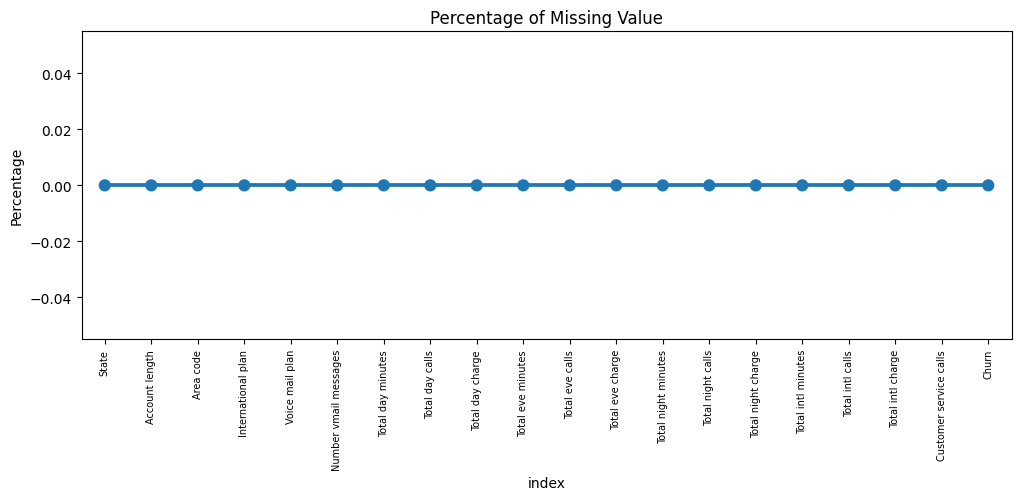

In [14]:
# Visualizing the missing values
# sns.heatmap(dataset.isnull(), cbar=False)

# Visualize the null value with a percentage
missing = pd.DataFrame((dataset.isnull().sum())*100/dataset.shape[0]).reset_index()
plt.figure(figsize=(12, 4))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Value")
plt.ylabel("Percentage")
plt.show()



### What did you know about your dataset?

This dataset, from the Telecommunication industry, focuses on customer churn analysis. Churn prediction helps prevent customers from leaving a product or service by understanding and addressing their needs. The dataset contains 3333 rows and 20 columns, with no missing or duplicate values.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
pd.DataFrame(dataset.columns, columns=['Column Name'])

,Column Name
0,State
1,Account length
2,Area code
3,International plan
4,Voice mail plan
5,Number vmail messages
6,Total day minutes
7,Total day calls
8,Total day charge
9,Total eve minutes


In [16]:
# Dataset Describe
dataset.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


### Variables Description

* **State                :**categorical for the 51 states

* **Account Length       :**how long account has been active

* **Area Code            :**Code Number of Area having some States included in each area code

* **lntl Plan            :**Internat ional plan activated ( yes, no )

* **VMail Plan           :**  ice Mail plan activated ( yes ,no )

* **VMail Message        :**No.of voice mail messages

* **Day Mins             :**Total day minutes used

* **Day calls**         :Total day calls made

* **Day Charge**         :Total day charge

* **Eve Mins**          :Total evening minutes

* **Eve Calls**          :Total evening calls

* **Eve Charge**         :Total evening charge

* **Night Mins**         :Total night minutes

* **Night Calls**        :Total night calls

* **Night Charge**      :Total night charge

* **Intl Mins**         :Total International minutes used

* **Intl Calls**         :Total International calls made

* **Intl Charge**        :Total International charge

* **CustServ calls**    :Number of customer service calls made

* **Churn**             :Customer churn (Target Variable True=1, False=0)

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
dataset.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Make dataset analysis ready.
tel_df = dataset.copy()
tel_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [19]:
#To calculate the 'Average Call Duration' we consider
#['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes'] columns and
#['Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls']columns

tel_df['Average Call Duration'] = tel_df.iloc[:, 6:18:3].sum(axis=1)/tel_df.iloc[:, 7:17:3].sum(axis=1)
tel_df['Average Call Duration'].describe()

count    3333.000000
mean        1.964884
std         0.376958
min         0.798596
25%         1.705187
50%         1.939936
75%         2.195963
max         3.612245
Name: Average Call Duration, dtype: float64

In [20]:
#To calculate the 'Regular Call Charge Rate' we consider
#['Total day charge', 'Total eve charge', 'Total night charge'] columns and
#['Total day calls', 'Total eve calls', 'Total night calls']columns

tel_df['Regular Call Charge Rate']= tel_df.iloc[:, 8:17:3].sum(axis=1) / tel_df.iloc[:, 7:16:3].sum(axis=1)
tel_df['Regular Call Charge Rate'].describe()


count    3333.000000
mean        0.191022
std         0.041955
min         0.063388
25%         0.162097
50%         0.188159
75%         0.217788
max         0.402548
Name: Regular Call Charge Rate, dtype: float64

In [21]:
#To calculate ' International Call Charge Rate' we consider only 'Total intl charge' and 'Total intl calls'
#columns

tel_df['International Cal Charge Rate'] = tel_df['Total intl charge'] / tel_df['Total intl calls']
tel_df['International Cal Charge Rate'].describe()

count    3315.000000
mean        0.840482
std         0.610441
min         0.058333
25%         0.455714
50%         0.664000
75%         1.026667
max         4.910000
Name: International Cal Charge Rate, dtype: float64

In [22]:
# check the number of missing values
tel_df['International Cal Charge Rate'].isna().sum()

18

In [23]:
# Set a specific value when 'Total intl calls' is zero
tel_df['International Cal Charge Rate'] = tel_df.apply(lambda row:row['Total intl charge']/ row['Total intl calls']
                                                       if row['Total intl calls'] > 0 else 0, axis=1 )

In [24]:
tel_df['International Cal Charge Rate'].isna().sum()

0

In [25]:
# Create dummy variables for categorical features
dummies = pd.get_dummies(tel_df[['International plan', 'Voice mail plan']])

In [26]:
# Add the dummies variable to the experimental dataset
tel_df = pd.concat([tel_df, dummies], axis=1)

In [27]:
categorical_columns = ['State', 'International plan', 'Voice mail plan']
tel_df = tel_df.drop(categorical_columns, axis=1)

In [28]:
tel_df['Churn'] = tel_df['Churn'].astype(int)

In [29]:
tel_df.head(3)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Average Call Duration,Regular Call Charge Rate,International Cal Charge Rate,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,2.366997,0.242867,0.900000,1,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1.883133,0.168815,1.233333,1,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1.619820,0.179878,0.658000,1,0,1,0


### What manipulations have we done and what insights have we found?
**In the data wrangling process**
1. We calculate the '**Average Call Duration**', and '**Regular Call Charge Rate** ' from various call-related columns as new features.
2. We also handled missing values in the 'International Call Charge Rate, ensuring there were no **NaNs**.
3. Additionally we created dummy variables for '**International Plan**' and '**Voic mail plan**' and removed the original categorical columns.
4.We dropped the '**State**' column from the dataset for the purpose of reducing dimentionality.
5. Converting a binary(Boolean) categorical column like 'Churn' to **numeric** values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 **To gain an initial insight into the relationships and correlations within the dataset**

Text(0.5, 1.0, 'Multi-Collinearity of Features')

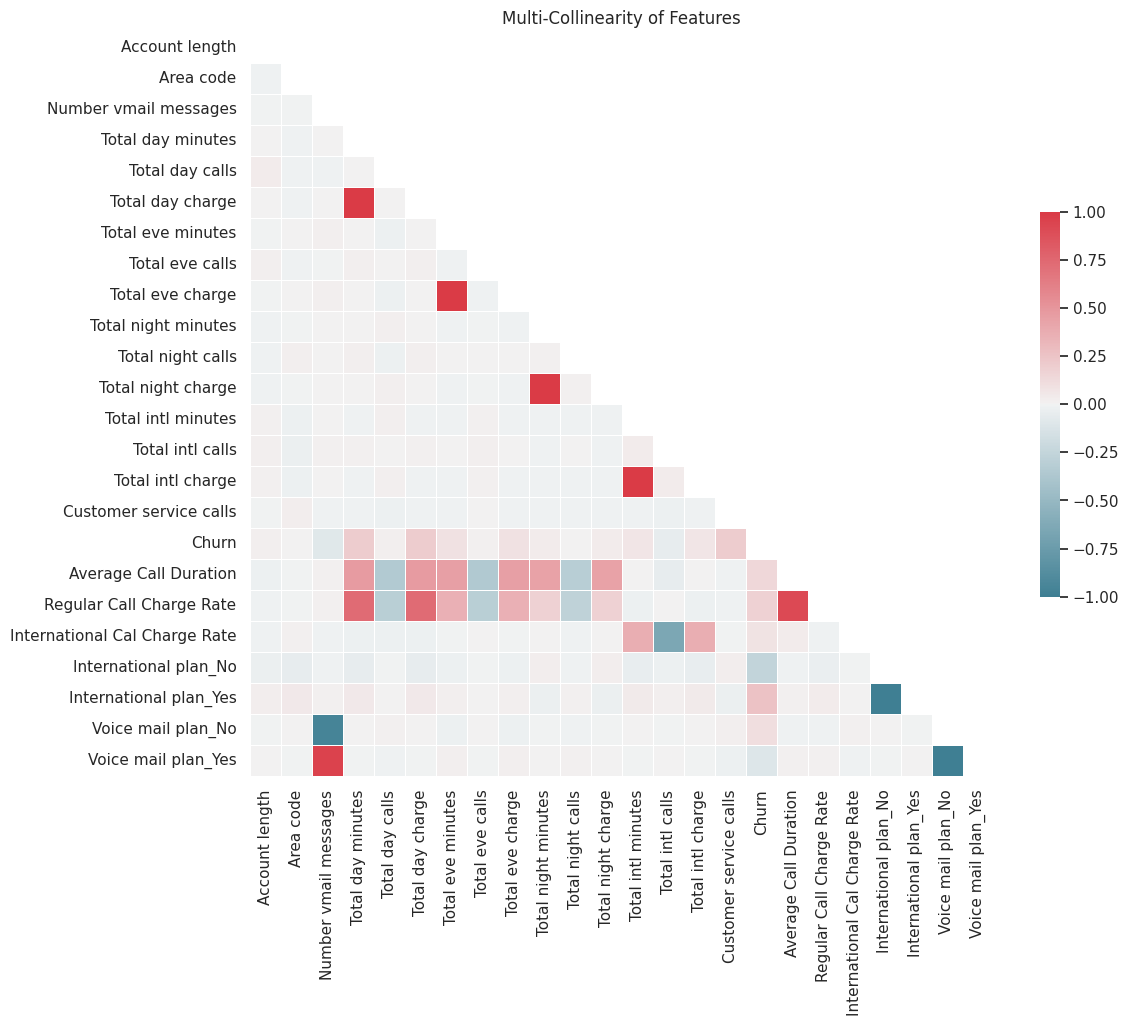

In [30]:
# Correlation Heatmap

''' let's create a heatmap'''
sns.set(style="white")
corr = tel_df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True,
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')

##### 1. Why did you pick the specific chart?

I picked the heatmap because it is a good way to visualize the correlation between multiple variables. The color of each cell in the heatmap represents the correlation between the two variables in that row and column. A darker color indicates a stronger correlation, either positive or negative.

##### 2. What is/are the insight(s) found from the chart?

As we can see that some features are strongly positively correlated with the target column 'Churn.' These features include 'Number vmail messages,' 'Total day minutes,' 'Total eve minutes,' 'Total night minutes,' and 'Average Call Duration.' They exhibit strong positive correlations with 'Churn.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*It's important to note that correlation does not imply causation. A correlation between two variables doesn't necessarily mean one causes the other. To explore this further, let's dive into our data.*

#### Chart - 2 **Explore our categorical variable with the target variable**

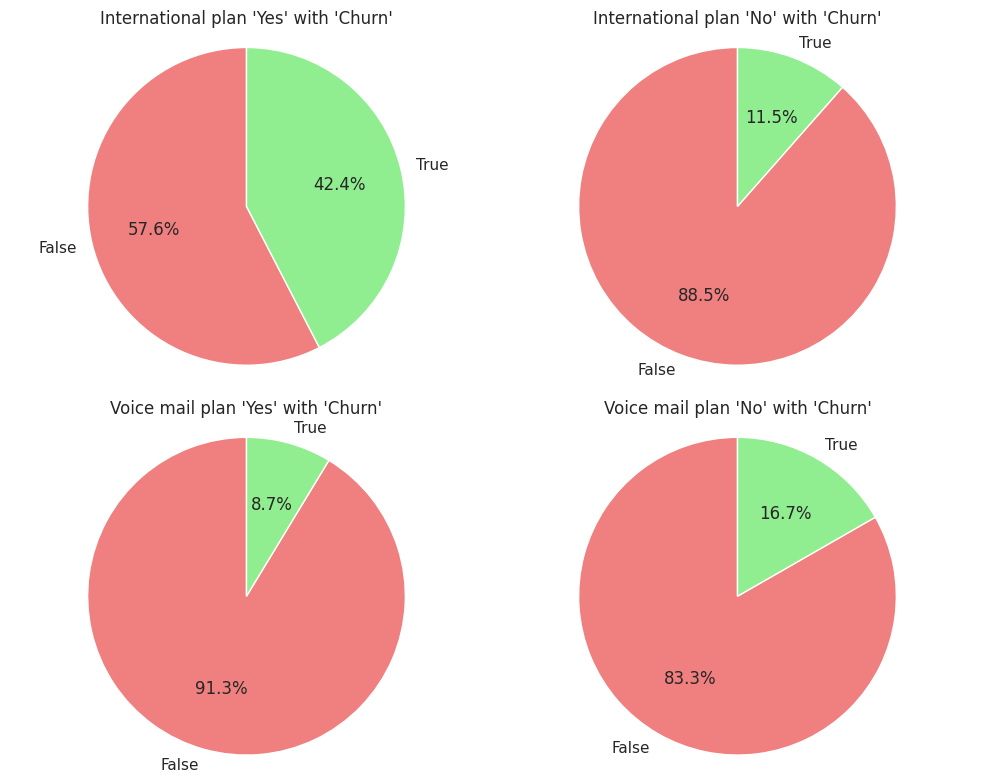

In [31]:
# Pie plot for a comprehensive visual overview.
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# International plan 'Yes' with "Churn"
churn_counts = dataset[dataset['International plan'] == 'Yes']['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values
colors = ['lightcoral', 'lightgreen']

axes[0, 0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title("International plan 'Yes' with 'Churn'")
axes[0, 0].axis('equal')

# International plan 'No' with "Churn"
churn_counts = dataset[dataset['International plan'] == 'No']['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values
colors = ['lightcoral', 'lightgreen']
axes[0, 1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title("International plan 'No' with 'Churn'")
axes[0, 1].axis('equal')

# Voice mail plan 'Yes' with "Churn"
churn_counts = dataset[dataset['Voice mail plan'] == 'Yes']['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values
colors = ['lightcoral', 'lightgreen']
axes[1, 0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title("Voice mail plan 'Yes' with 'Churn'")
axes[1, 0].axis('equal')

# Voice mail plan 'No' with "Churn"
churn_counts = dataset[dataset['Voice mail plan'] == 'No']['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values
colors = ['lightcoral', 'lightgreen']
axes[1, 1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title("Voice mail plan 'No' with 'Churn'")
axes[1, 1].axis('equal')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I picked the pie chart because it is a good way to visualize the distribution of categorical data

##### 2. What is/are the insight(s) found from the chart?

The pie charts show that the majority of customers in the dataset did not churn.
If we consider for those who have no international plan as well as voice plan
more than on average 85% of customers do not churn. However, there is still a significant number of customers who did churn. (11.5% and 16.7% for no international plan and voice mail plan, respectively).

But the interesting Another insight from the pie charts is that the churn rate is higher for customers with an international plan than it is for customers without an international plan (42.4% vs. 11.5%).

This suggests that customers with an international plan may be less satisfied with the service, or that they may be more likely to have problems with it.

but the same scenario is a bit different for the voicemail plan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact by address the factors that are driving churn. For example

Focus on improving customer satisfaction as well as improving the service experience if there was from company side  for customers with an international plan.


*I do not see any insights from the pie charts that lead to negative growth.*

#### Chart - 3 **Understanding Churn Through Call Minutes**

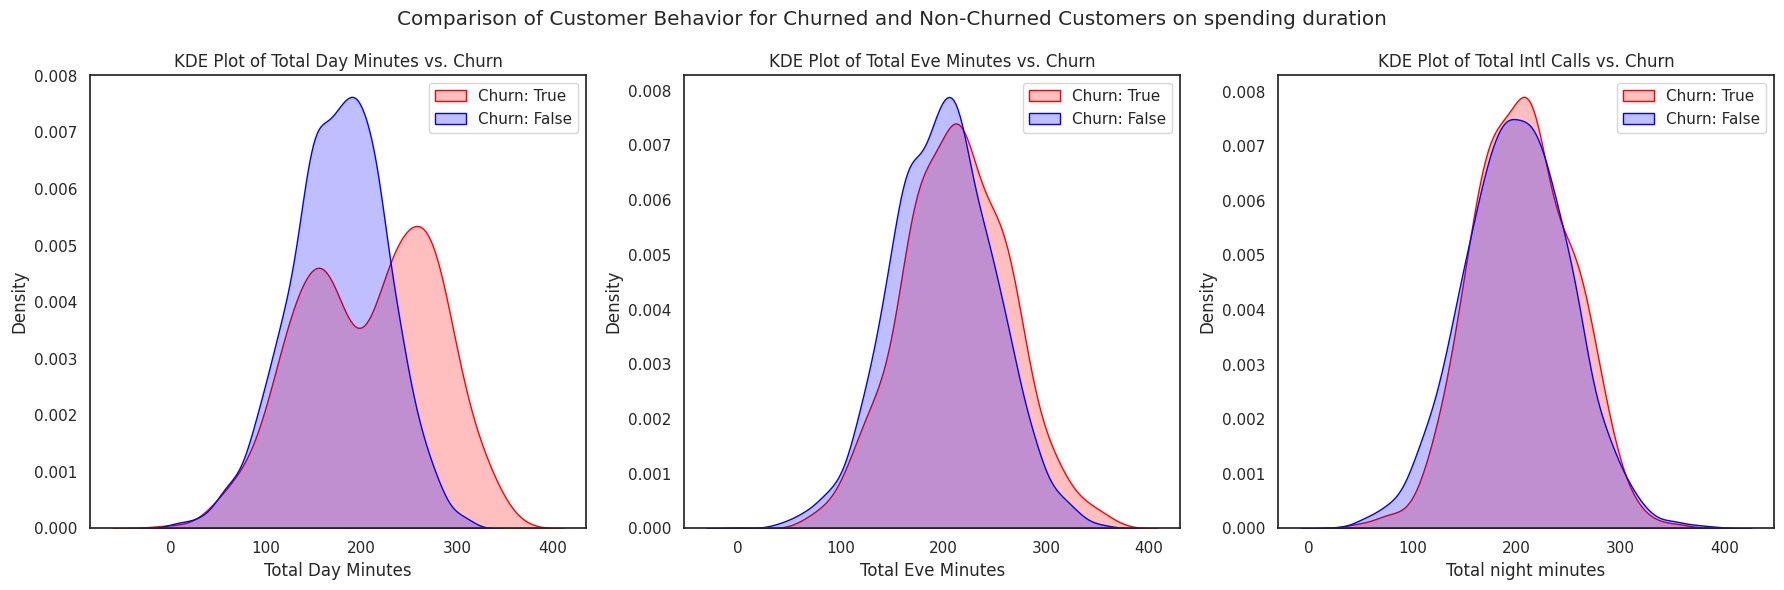

In [32]:
# Create subplots for the three plots in one row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Total Day Minutes KDE Plot
sns.kdeplot(data=tel_df[tel_df['Churn'] == True]['Total day minutes'], color='red', label='Churn: True', fill=True, ax=axes[0])
sns.kdeplot(data=tel_df[tel_df['Churn'] == False]['Total day minutes'], color='blue', label='Churn: False', fill=True, ax=axes[0])
axes[0].set_title('KDE Plot of Total Day Minutes vs. Churn')
axes[0].set_xlabel('Total Day Minutes')
axes[0].set_ylabel('Density')
axes[0].legend()

# Plot 2: Total Eve Minutes KDE Plot
sns.kdeplot(data=tel_df[tel_df['Churn'] == True]['Total eve minutes'], color='red', label='Churn: True', fill=True, ax=axes[1])
sns.kdeplot(data=tel_df[tel_df['Churn'] == False]['Total eve minutes'], color='blue', label='Churn: False', fill=True, ax=axes[1])
axes[1].set_title('KDE Plot of Total Eve Minutes vs. Churn')
axes[1].set_xlabel('Total Eve Minutes')
axes[1].set_ylabel('Density')
axes[1].legend()

# Plot 3: Total night minutes KDE Plot
sns.kdeplot(data=tel_df[tel_df['Churn'] == True]['Total night minutes'], color='red', label='Churn: True', fill=True, ax=axes[2])
sns.kdeplot(data=tel_df[tel_df['Churn'] == False]['Total night minutes'], color='blue', label='Churn: False', fill=True, ax=axes[2])
axes[2].set_title('KDE Plot of Total Intl Calls vs. Churn')
axes[2].set_xlabel('Total night minutes')
axes[2].set_ylabel('Density')
axes[2].legend()

# Set a common title for all subplots
plt.suptitle('Comparison of Customer Behavior for Churned and Non-Churned Customers on spending duration')

# Adjust layout for readability
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

I picked the kernel density estimation (KDE) plot because it is a good way to visualize the distribution of a continuous variable (total day minutes, total eve minutes, total night minutes) for two different groups (churned and non-churned customers)

##### 2. What is/are the insight(s) found from the chart?

Churned customers tend to have lower total day minutes, total eve minutes, and total night minutes than non-churned customers. This means that churned customers are making fewer calls overall than non-churned customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Target churned customers with special offers or discounts on calling plans that are designed to encourage them to make more calls.

Develop strategies to reduce churn among customers who are making fewer calls overall.


#### Chart - 4  **Think to visualize the "Average Call Duration" for customers who are churning**

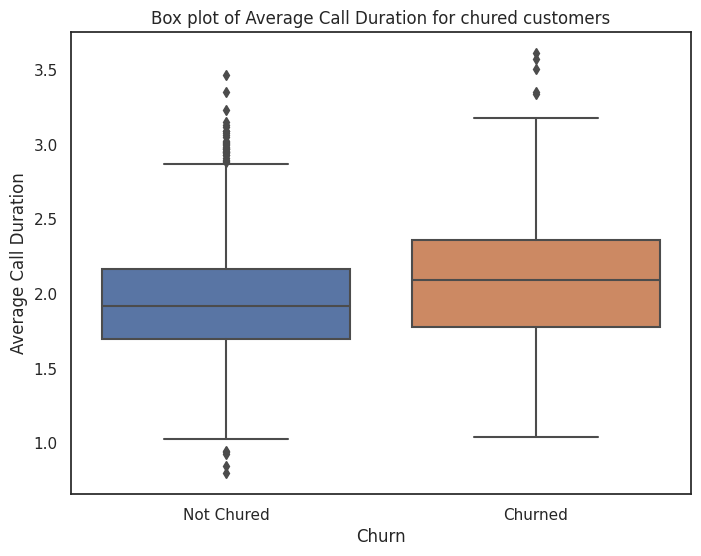

In [33]:
# Create a box plot for the 'Average Call Duration' of chured customer
plt.figure(figsize=(8,6))
sns.boxplot(data=tel_df, y='Average Call Duration', x='Churn')
plt.title('Box plot of Average Call Duration for chured customers')
plt.xlabel('Churn')
plt.ylabel('Average Call Duration')
plt.xticks(ticks=[0, 1], labels=['Not Chured', 'Churned'])

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

I picked the box plot because it is a good way to visualize the distribution of a continuous variable, such as average call duration, across two categories (churned vs. not churned). The box plot shows the median, quartiles, and outliers of the distribution, which can help to identify any differences in average call duration between the two categories.

##### 2. What is/are the insight(s) found from the chart?

The median average call duration for churned customers is longer than the median average call duration for not churned customers.
This suggests that churned customers are more likely to have longer calls than not churned customers.

The interquartile range (IQR) for churned customers is also wider than the IQR for not churned customers. This suggests that there is more variation in average call duration among churned customers.

There are a few outliers in both categories, but there are more outliers among churned customers. This suggests that there are a few churned customers who have extremely long calls.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Understanding Customer Behavior***: The insights suggest that churned customers tend to have longer average call durations, indicating that they might be more engaged with the service. This understanding is valuable for the business.

***Segmentation***: Knowing that churned customers have a wider variation in average call duration can lead to segmentation strategies. The business can group customers based on their call duration patterns and target specific segments with personalized offers or interventions.

***Outlier Detection***: Identifying the presence of outliers among churned customers can be an opportunity. These outliers might represent a specific subgroup of customers with unique needs. The business can investigate these outliers further and potentially offer tailored solutions to prevent churn.


#### Chart - 5 **Is there any discrepancy on international charges, let's filter the dataset for 'International plan' == 'Yes'**

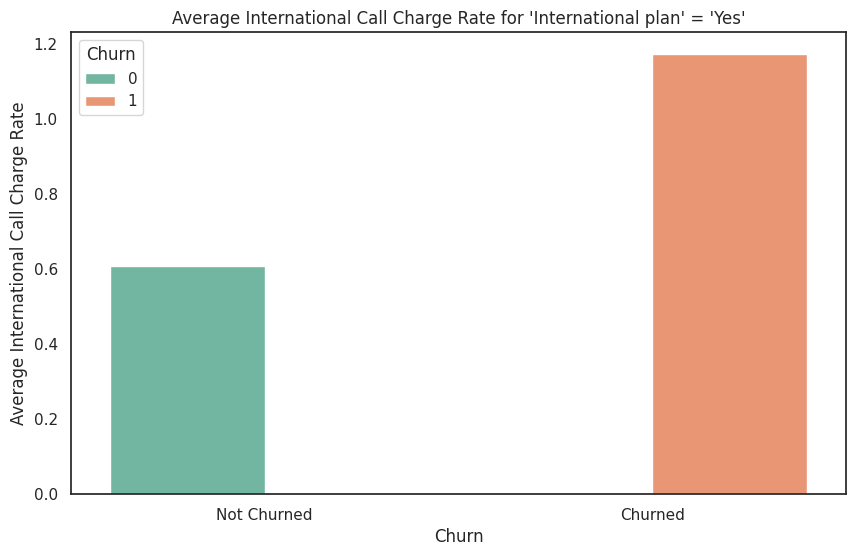

In [34]:
# Rename column name properly
tel_df.rename(columns={'International Cal Charge Rate': 'International Call Charge Rate'}, inplace=True)

# customer with international plan
filtered_data = tel_df[tel_df['International plan_Yes'] == 1]

# Group the data by 'Churn' and calculate the average payment for international calls
payment_summary = filtered_data.groupby('Churn')[['International Call Charge Rate']].mean().reset_index()

# Create a bar plot to compare the average payment for international calls for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_summary, x='Churn', y='International Call Charge Rate', hue='Churn', palette='Set2')
plt.title("Average International Call Charge Rate for 'International plan' = 'Yes'")
plt.ylabel('Average International Call Charge Rate')
plt.xlabel('Churn')
plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'])

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I picked the bar chart because it is a good way to visualize the relationship between two variables. The bar chart allows us to see that there is a positive correlation between the average international call charge rate and churn.

##### 2. What is/are the insight(s) found from the chart?

Customers who churn have a higher average international call charge rate than customers who do not churn.
This suggests that customers who churn are more likely to use the international calling features of the plan. This will become more clear when we analyze others features regarding International call.
It is also possible that customers who churn are simply paying more for the international calling features than they are using.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying customers who are at high risk of churning due to their high usage of international calling features. *Maybe they don't remember when they talk but maybe they see it when they go to pay.*

Developing strategies to reduce churn among these customer segments, such as offering discounts on international calling or providing more affordable international calling plans.


#### Chart - 6 **Examining Call Frequency for Churning Customers with International Plan_Yes.**

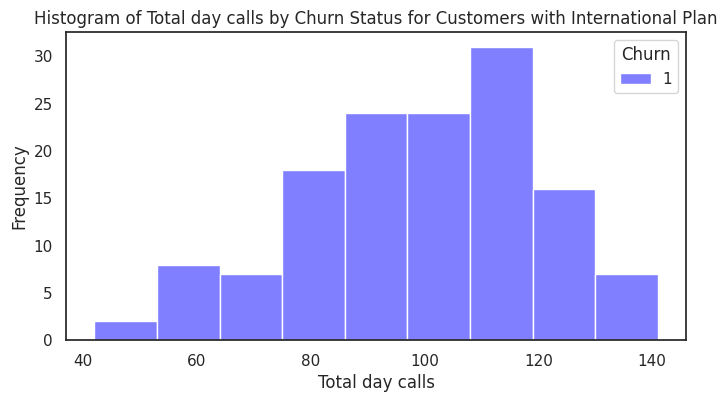

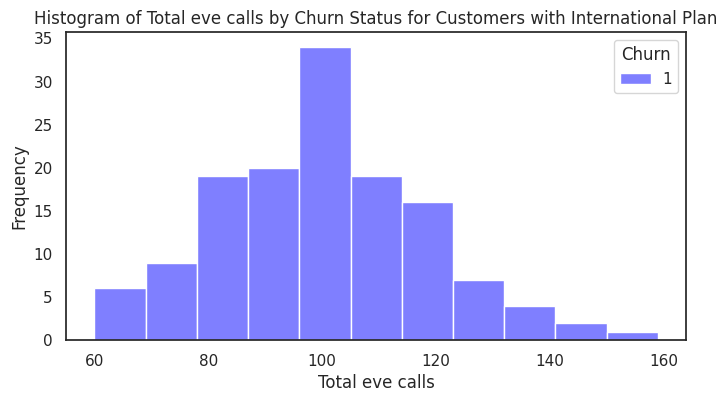

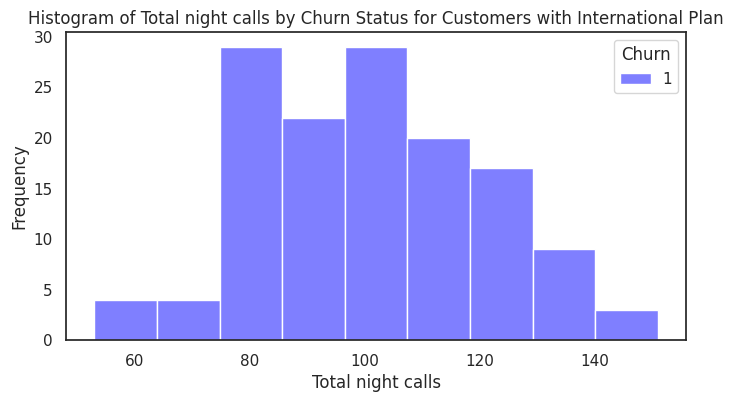

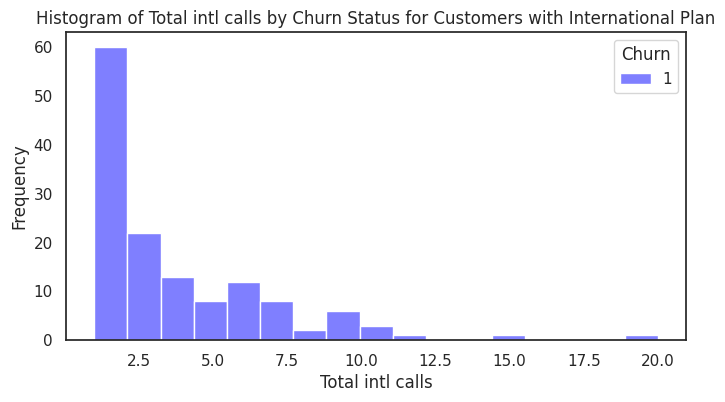

In [35]:
# Filter the dataset for customers with 'International plan' = 'Yes'
international_plan_yes = tel_df[(tel_df['International plan_Yes']) & (tel_df['Churn'] == 1)]

colors = ['blue']

call_types = ['Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls']

for call_type in call_types:

  plt.figure(figsize=(8, 4))
  sns.histplot(data=international_plan_yes, x=call_type, hue='Churn', kde=False, palette=colors)
  plt.title(f'Histogram of {call_type} by Churn Status for Customers with International Plan')
  plt.xlabel(f'{call_type}')
  plt.ylabel('Frequency')

  # Show the plot
  plt.show()

##### 1. Why did you pick the specific chart?

chose to use histograms because they effectively display the frequency distribution of the values within each variable, enabling me to visualize and compare the distribution of total day, eve, night, and international calls for both churned and not churned customers.

##### 2. What is/are the insight(s) found from the chart?

**Total Day Calls**: Churned customers tend to have a higher frequency of total day calls around 120.

**Total Evening Calls**: For churned customers, the frequency is higher around 90 and 100 total evening calls.

**Total Night Calls**: The distribution of total night calls for churned customers shows a peak around 80 and 100.

**Total International Calls**: The distribution of total international calls among churned customers suggests that a significant number have around 3 and 5 international calls.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Provide targeted features during the times when churned customers are more active in making calls.

Tailor service plans or offers to meet the specific calling habits of churned customers.



#### Chart - 7 **Let's examine how much the 'Number of voice mail' influences churn**

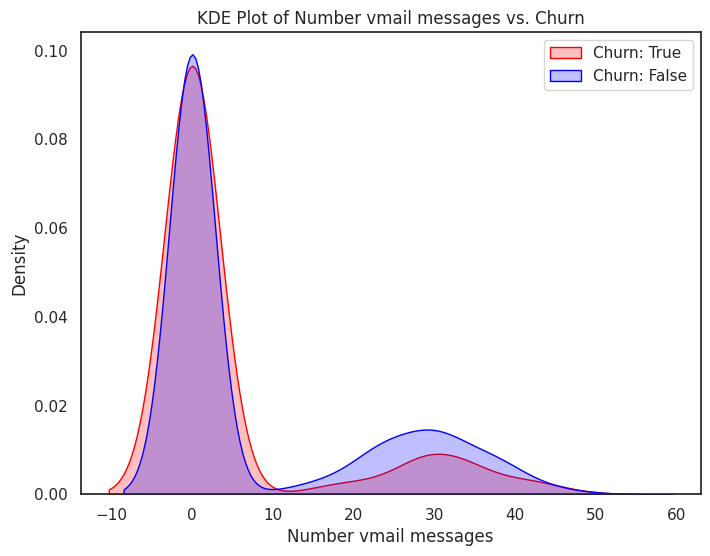

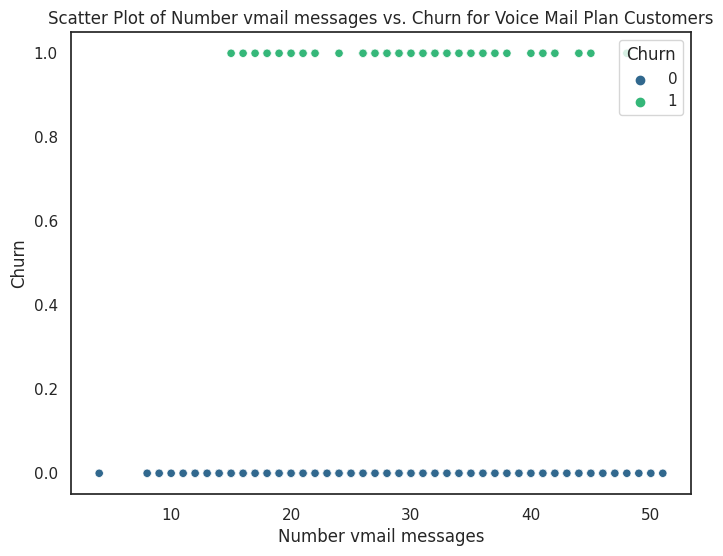

In [36]:
# Distribution of 'Number vmail messages' differs between churned and not churned customers

# Set fig size
plt.figure(figsize=(8, 6))
sns.kdeplot(data=tel_df[tel_df['Churn'] == True]['Number vmail messages'], color='red', label='Churn: True', fill=True)
sns.kdeplot(data=tel_df[tel_df['Churn'] == False]['Number vmail messages'], color='blue', label='Churn: False', fill=True)
plt.title('KDE Plot of Number vmail messages vs. Churn')
plt.xlabel('Number vmail messages')
plt.ylabel('Density')
plt.legend()
plt.show()

# Filter data on voice mail plan_Yes
voice_mail_plan_customers = tel_df[tel_df['Voice mail plan_Yes'] == 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=voice_mail_plan_customers, x='Number vmail messages', y='Churn', hue='Churn', palette='viridis')
plt.title('Scatter Plot of Number vmail messages vs. Churn for Voice Mail Plan Customers')
plt.xlabel('Number vmail messages')
plt.ylabel('Churn')
plt.legend(title='Churn', loc='upper right')
plt.show()


##### 1. Why did you pick the specific chart?

I picked the kde and scatter plot because it is a good way to visualize the relationship between two variables. In this case, I wanted to see if there was a relationship between the number of voicemail messages a customer receives and whether they churn or not

##### 2. What is/are the insight(s) found from the chart?

The density is approximately 0.1 within the -10 to 10 range for both churned and not churned customers, indicating that this range of 'Number vmail messages' is relatively common within the dataset.

This means that within this range, there isn't a clear distinction between churned and not churned customers based on the number of voicemail messages they have.

The scatter plot shows that there is a positive correlation between the number of voicemail messages and churn. This means that customers who receive more voicemail messages are more likely to churn.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see
a slight **positive correlation** between the number of voicemail messages a customer receives and whether or not they churn. This means that customers who receive more voicemail messages are more likely to churn.

The company could improve the quality of its voicemail transcription service, so that customers can more easily review their voicemail messages without having to listen to them all.It may reduce **customer frustration** and improve satisfaction

The company could send a **personalized message** to customers who receive a lot of voicemail messages, letting them know about features that can help them manage their voicemail more effectively.


#### Chart - 8 **Unveiling the impact of Charges on Customer churn Behavior with 'Account length'**

---



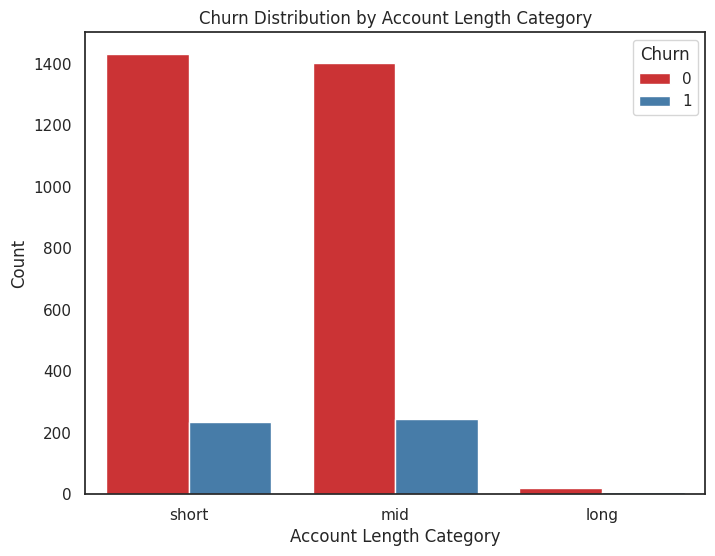

In [37]:
# Define custom bins for 'Account length' based on categories
custom_bins = [0, 100, 200, float('inf')]  # Categories: short, mid, long

# Create a new column 'Account Length Category' to represent the custom account length bins
tel_df['Account Length Category'] = pd.cut(tel_df['Account length'], bins=custom_bins, labels=['short', 'mid', 'long'])

# Create a bar plot to visualize churn by account length category
plt.figure(figsize=(8, 6))
sns.countplot(data=tel_df, x='Account Length Category', hue='Churn', palette='Set1')
plt.title('Churn Distribution by Account Length Category')
plt.xlabel('Account Length Category')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')

# Show the plot
plt.show()




##### 1. Why did you pick the specific chart?

I picked the bar chart because it is a good way to visualize the distribution of a categorical variable, in this case account length category. Bar charts are also good for comparing the distribution of a categorical variable across different groups, in this case churn.

##### 2. What is/are the insight(s) found from the chart?

The bar chart reveals that the churn rate is higher among customers with short and mid-term account lengths, indicating that they are more likely to churn. In contrast, customers with long-term account lengths exhibit a lower churn rate, suggesting that they are less likely to switch to another service provider.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help to create a positive business impact in a few ways for example

The business could offer a discount on the first month of service to new customers.

The business could send a welcome email to new customers with information about the benefits of using the service and how to get started.

The business could collect feedback from customers with short account lengths to understand why they are churning and what could be done to keep them as customers.


#### Chart - 9 **Analyzing Call Charge Rates Across Account Length Categories**

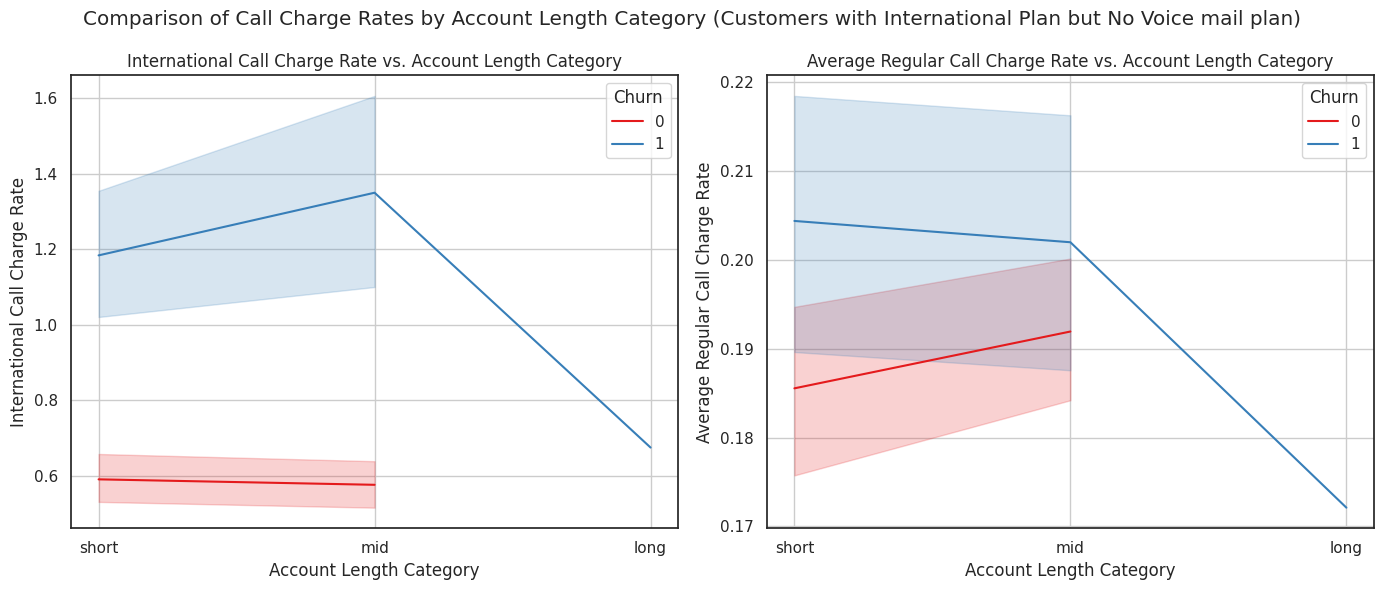

In [38]:
# Filter the dataset for customers with 'International plan' = 'Yes' and 'Voice mail Plan' = 'No'
international_plan = tel_df[(tel_df['International plan_Yes'] == 1) & (tel_df['Voice mail plan_Yes'] == 0)]

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: International Call Charge Rate vs. Account Length Category
sns.lineplot(data=international_plan, x='Account Length Category', y='International Call Charge Rate', hue='Churn', palette='Set1', ax=axes[0])
axes[0].set_title('International Call Charge Rate vs. Account Length Category')
axes[0].set_xlabel('Account Length Category')
axes[0].set_ylabel('International Call Charge Rate')
axes[0].legend(title='Churn', loc='upper right')
axes[0].grid(True)

# Plot 2: Regular Call Charge Rate vs. Account Length Category
sns.lineplot(data=international_plan, x='Account Length Category', y='Regular Call Charge Rate', hue='Churn', palette='Set1', ax=axes[1])
axes[1].set_title('Average Regular Call Charge Rate vs. Account Length Category')
axes[1].set_xlabel('Account Length Category')
axes[1].set_ylabel('Average Regular Call Charge Rate')
axes[1].legend(title='Churn', loc='upper right')
axes[1].grid(True)

# Add a common title for the row of plots
plt.suptitle('Comparison of Call Charge Rates by Account Length Category (Customers with International Plan but No Voice mail plan)')

# Show the plots
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

A subplot with two line charts to compare the international call charge rate and regular call charge rate by account length category for customers with an international plan but no voicemail plan. This is a good choice because it allows to visualize two related metrics on the same plot, making it easier to compare trends


##### 2. What is/are the insight(s) found from the chart?

For international calls, customers with short account lengths pay the highest rates, while customers with long account lengths pay the lowest rates. For regular calls, customers with short account lengths pay the lowest rates, while customers with mid and long account lengths pay the highest rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The business could offer a discount on international calling to new customers who sign up for a long-term contract.

The business could send a targeted email to customers with short account lengths who are making a lot of international calls, offering them a discount on international calling or a free upgrade to a plan with more international calling minutes.


#### Chart - 10 **Exploring the Impact of Area Code on Customer Service Calls and Churn**

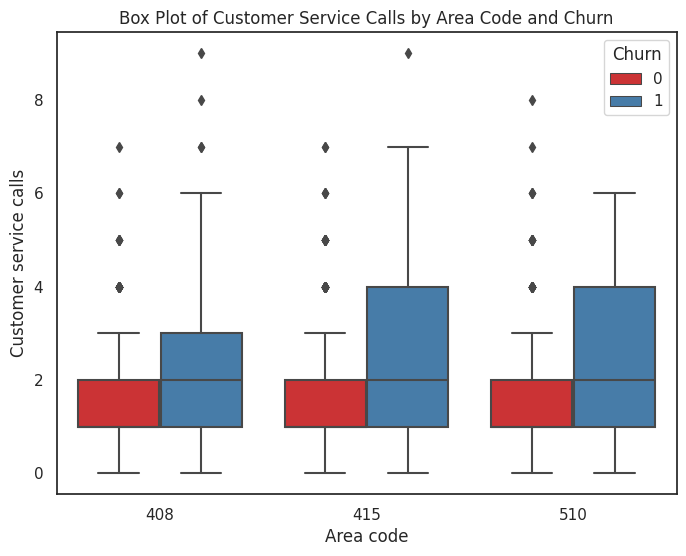

In [39]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Area code', y='Customer service calls', hue='Churn', data=tel_df, palette='Set1')
plt.title('Box Plot of Customer Service Calls by Area Code and Churn')
plt.xlabel('Area code')
plt.ylabel('Customer service calls')
plt.legend(title='Churn', loc='upper right')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

The box plot because it is a good way to visualize the distribution of a continuous variable (customer service calls) across different categories (area code and churn).

##### 2. What is/are the insight(s) found from the chart?

The box plot shows that the distribution of customer service calls varies by area code and churn. The median number of customer service calls is higher for churned customers than it is for retained customers. The **median number** of customer service calls is also **higher** for customers in certain area codes, such as **415** and **510**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Target customers in area codes with high customer service call rates with special offers or discounts.

Develop strategies to reduce churn among customers who are calling customer service frequently.


#### Chart - 11 **Churn Correlation Matrix**


<ipython-input-40-ea8cfe6ca987>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_series = tel_df.corr()['Churn'].sort_values(ascending=False)


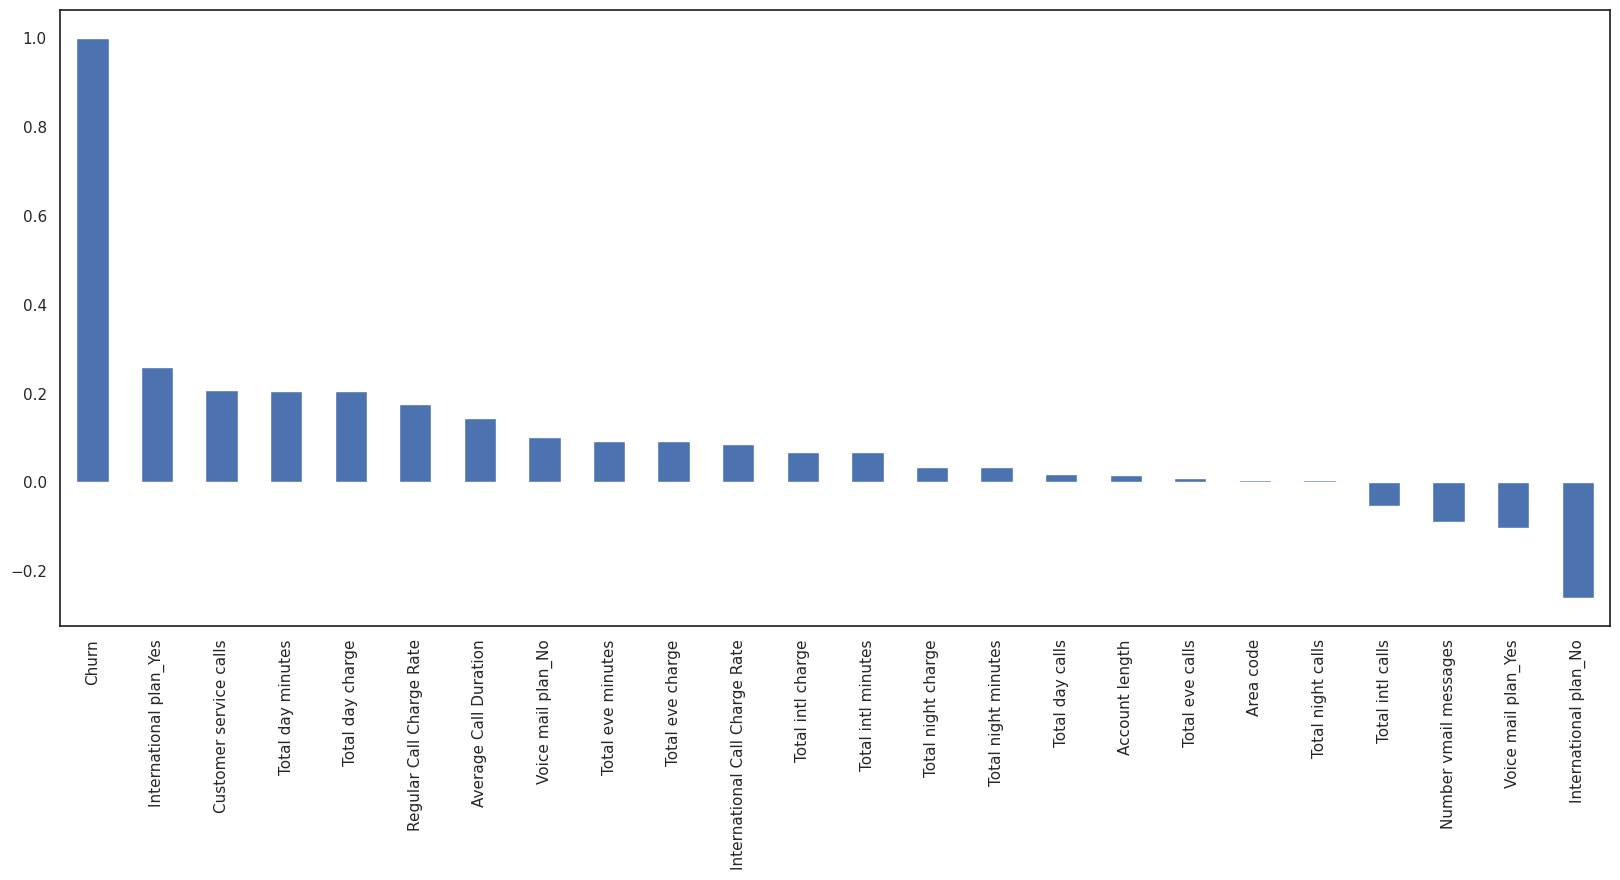

In [40]:
# Set figure size
plt.figure(figsize=(20, 8))

# Calculate the correlation and sort the values
correlation_series = tel_df.corr()['Churn'].sort_values(ascending=False)

# Create a bar plot
correlation_series.plot(kind='bar')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?


The bar chart shows the correlation coefficients in descending order, so the factors that are most strongly correlated with churn are at the top of the chart.


##### 2. What is/are the insight(s) found from the chart?

The chart shows that the following factors are most correlated with churn:

>**Total day minutes-**
>**Total eve minutes-**
>**Total night minutes-**
>**Number of voicemail messages-**
>**Account length**

This means that customers who make more calls, receive more voicemail messages, and have shorter account lengths are more likely to churn.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Offer special discounts or promotions to customers who make a lot of calls.

Improve the voicemail service to make it easier for customers to manage their messages.

Target customers with shorter account lengths with special offers or discounts to encourage them to stay with the company.


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1.	**Focus on improving customer satisfaction and service experience**, especially for customers with an international plan. This can be done by offering special offers or discounts, developing strategies to reduce churn among customers who are making fewer calls overall, and providing targeted features during the times when churned customers are more active in making calls.

2.	**Tailor service plans or offers** to meet the specific calling habits of churned customers. This can help to improve customer satisfaction and reduce churn.

3.	**Improve the quality of the voicemail transcription service**. This will make it easier for customers to manage their voicemail messages and reduce frustration.

4.	**Send personalized messages to customers who receive a lot of voicemail messages**, letting them know about features that can help them manage their voicemail more effectively. This will help to improve customer satisfaction and reduce churn.

5.	**Target customers with short account lengths** with special offers or discounts. This will help to encourage them to stay with the company.

6.	**Reduce churn among customers who are calling customer service frequently**. This can be done by identifying the reasons why they are calling customer service and developing strategies to address those issues.



## **Conclusion**

In conclusion, the analysis highlights the importance of understanding customer behavior, segmenting the customer base, and providing tailored solutions to reduce churn and enhance customer satisfaction. The insights can drive positive business impacts, including increased customer retention, revenue, and overall business growth.

### ***Hurrah! I have completed my first EDA (Exploratory Data Analysis) Capstone Project !!!***